<a href="https://colab.research.google.com/github/JLK5/komiwojazerAlt/blob/main/komiwoja%C5%BCerAlt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

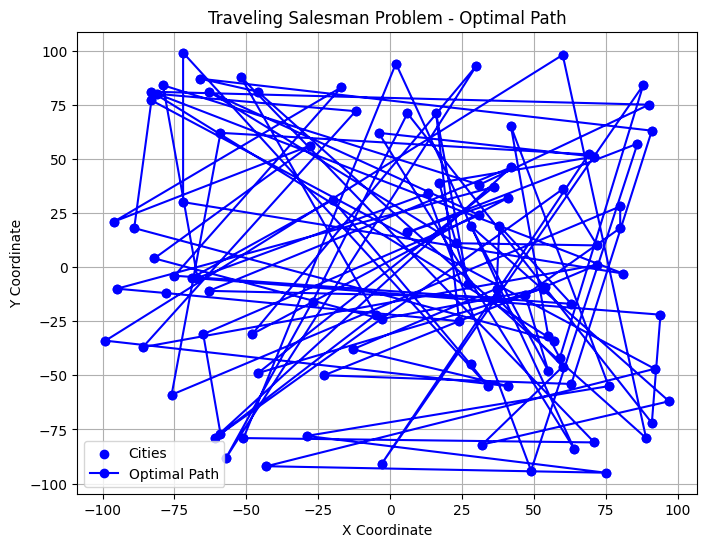

In [ ]:
import json
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt

with open('data.json') as file:
    data = json.load(file)

coords = np.array([[city['x'], city['y']] for city in data])

#calculate distance
distances = np.sqrt(np.sum((coords[:, np.newaxis] - coords) ** 2, axis=-1))

#hungarian algorithm = minimum distance path
row_ind, col_ind = linear_sum_assignment(distances)

#reorder
optimal_order = col_ind.tolist()
optimal_order.append(optimal_order[0])

#find coordinates
optimal_path_coords = coords[optimal_order]

#visualize the cities and the optimal path
plt.figure(figsize=(8, 6))
plt.scatter(coords[:, 0], coords[:, 1], c='blue', label='Cities')
plt.plot(optimal_path_coords[:, 0], optimal_path_coords[:, 1], c='blue', linestyle='-', marker='o', label='Optimal Path')
plt.title('Traveling Salesman Problem - Optimal Path')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()
